# Imports and installations

In [ ]:
import requests
# import apimoex # для скачивания котировок
import pandas as pd # для хранения и анализа
from tqdm import tqdm # для отслеживания прогресса 
import tkinter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set_theme()

In [ ]:
!pip install pmdarima

In [ ]:
!pip install arch

     |████████████████████████████████| 902 kB 25.1 MB/s 


In [ ]:
!pip install ThymeBoost

     |████████████████████████████████| 52 kB 1.1 MB/s 


Get data for two companies: yandex (YNDX) and gasprom (GAZP.ME)

In [ ]:
!wget https://www.dropbox.com/s/b1bhsvky2itj8on/GAZP.ME.csv?dl=0 -O GAZP.ME.csv

--2022-03-18 06:40:32--  https://www.dropbox.com/s/b1bhsvky2itj8on/GAZP.ME.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/b1bhsvky2itj8on/GAZP.ME.csv [following]
--2022-03-18 06:40:32--  https://www.dropbox.com/s/raw/b1bhsvky2itj8on/GAZP.ME.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7fe877776b25ac6fb3c22c1dae.dl.dropboxusercontent.com/cd/0/inline/BhqYUHGeb32oQx9B2w5re4gd5GSlyoHWFZsxlZk4JQhn6OKK6o4CMCgk3kVPfjjSIOQUSmwJDkWpe7tpU8lLzfy28pFnewA-VwbKZ_Ul6uEWV49HXfAfLt0-nJIKHEXLNUcJLgpDEofDIJfj9V7xLRvFCBcP_MU5Lxm-ABsQJv-tTA/file# [following]
--2022-03-18 06:40:32--  https://uc7fe877776b25ac6fb3c22c1dae.dl.dropboxusercontent.com/cd/0/inline/BhqYUHGeb32oQx9B2w5re4gd5GSlyoHWFZsxlZk4JQhn6OKK6o4CMCgk3kVPfjjSIO

In [ ]:
!wget https://www.dropbox.com/s/341u8yvdvey8p4f/YNDX.csv?dl=0 -O YNDX.csv

--2022-03-18 06:40:33--  https://www.dropbox.com/s/341u8yvdvey8p4f/YNDX.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/341u8yvdvey8p4f/YNDX.csv [following]
--2022-03-18 06:40:34--  https://www.dropbox.com/s/raw/341u8yvdvey8p4f/YNDX.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc002d630f48d5f50dd4264a92ba.dl.dropboxusercontent.com/cd/0/inline/BhrtSzXC7FXKPJSeQ0Lkjef7hjP3xGIsljoxezYWG-6Qnbe2eytvv7KQwZWPZPv5_HQIhG0-VIFOpuS4PDznFimfH9Apvvw7LmL-VT2ZhG6W_0PRvA1ncMxTCRyBwG14fFhblH-DSmdpliLF0guOUdBdLYJI5C-XhbiY4g3pxl_e5A/file# [following]
--2022-03-18 06:40:34--  https://uc002d630f48d5f50dd4264a92ba.dl.dropboxusercontent.com/cd/0/inline/BhrtSzXC7FXKPJSeQ0Lkjef7hjP3xGIsljoxezYWG-6Qnbe2eytvv7KQwZWPZPv5_HQIhG0-VIF

In [ ]:
data1 = pd.read_csv("/content/GAZP.ME.csv", sep=',')
data2 = pd.read_csv("/content/YNDX.csv", sep=',')
data1 = data1.rename(columns={"Open": "GAZP"})
data2 = data2.rename(columns={"Open": "YNDX"})
data1 = data1.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1)
data2 = data2.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1)
# data1 = data1.set_index('Date')
# data2 = data2.set_index('Date')
# data1

All information that we need from data is OPEN for both companies.

# The visualisation of price

In [ ]:
import matplotlib.pylab as pll

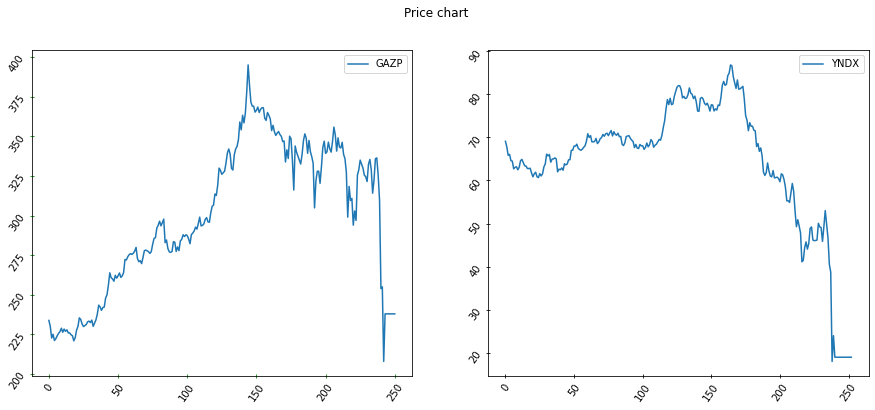

In [ ]:
fig, axs = pll.subplots(1, 2, figsize = (15, 6))

axs[0].tick_params(axis = 'both',    
               which = 'major',    
               direction = 'inout',    
               labelsize = 10,   
               bottom = True,
               color = 'green',
               left = True,  
               labelbottom = True,    
               labelleft = True, 
               labelrotation = 55)
axs[1].tick_params(axis = 'both',    
               which = 'major',    
               direction = 'inout',    
               labelsize = 10,   
               bottom = True,    
               left = True,  
               labelbottom = True,
               labelleft = True, 
               labelrotation = 55)

fig.suptitle('Price chart')

sns.lineplot(data = data1, ax=axs[0])
sns.lineplot(data = data2, ax=axs[1])

We can see that both of charts are not stationary and it can also be seen that in 2021 there was a steady increase in stocks until the winter of 2021. At first, there was a gradual decrease in share prices, but then, taking into account current events, the shares fell almost twice at one moment.

# Distribution of price

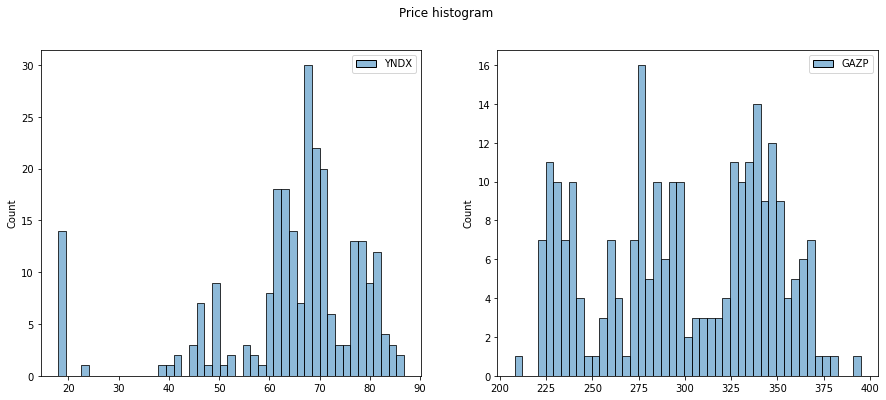

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))
fig.suptitle('Price histogram')

sns.histplot(data=data2, bins=45, ax=axs[0])
sns.histplot(data=data1, bins=45, ax=axs[1])


# Yield distribution

In [ ]:
data1 = data1.set_index('Date')
data2 = data2.set_index('Date')
data1

In [ ]:
data1_returns = data1['GAZP'].pct_change()

In [ ]:
data2_returns = data2['YNDX'].pct_change()
data2_returns

0           NaN
1     -0.018669
2     -0.029052
3      0.003493
4     -0.022249
         ...   
248    0.000000
249    0.000000
250    0.000000
251    0.000000
252    0.000000
Name: YNDX, Length: 253, dtype: float64

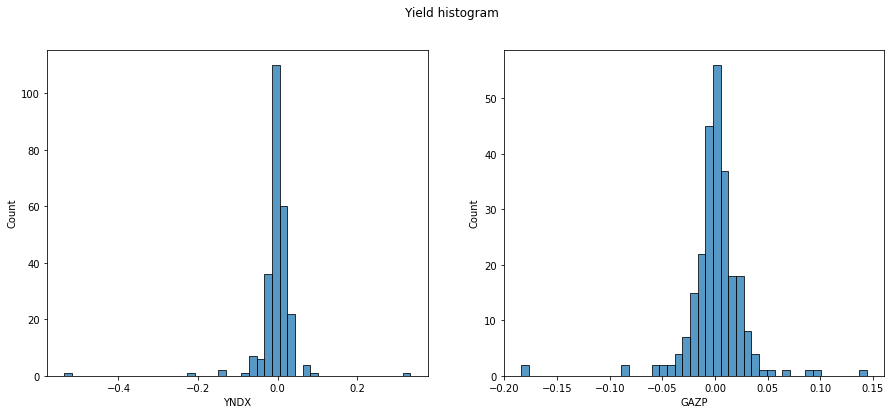

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15, 6))
fig.suptitle('Yield histogram')

sns.histplot(data=data2_returns, bins=45, ax=axs[0])
sns.histplot(data=data1_returns, bins=45, ax=axs[1])


We can notice a large variance. This is understandable given the events and drastic changes due to the sanctions.

# Models


here we will consider 3 models for 2 companies on the interval of a year, half a year and 3 months

## Arima

In [ ]:
import pmdarima as pm

In [ ]:
def ArimaModel(train):
    model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)
    return model
                      
def ArimaModelGraph(model, train, test):
    fitted_res = model.arima_res_.get_forecast(test_size, alpha = 0.05)
    # Forecast
    fc=fitted_res.predicted_mean
    se=fitted_res.se_mean
    conf=fitted_res.conf_int(alpha=0.05)
 
    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

### Yandex (YNDX)

#### YEAR

In [ ]:
train_size = len(data2) - 14
test_size = 14

In [ ]:
train_YNDX = data2[:train_size]['YNDX']
test_YNDX = data2[train_size:]['YNDX']

In [ ]:
model = ArimaModel(train_YNDX)

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1072.172, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1006.145, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1007.826, Time=0.12 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=1005.349, Time=0.34 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=1001.184, Time=0.24 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1032.247, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1005.998, Time=0.21 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1009.745, Time=0.19 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=999.291, Time=0.42 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=1000.860, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1027.638, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1004.982, Time=0.41 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=995.702, Time=0.76 sec
 ARIMA(3,2,0)(0,0,0)[0

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  239
Model:               SARIMAX(2, 2, 3)   Log Likelihood                -490.851
Date:                Fri, 18 Mar 2022   AIC                            995.702
Time:                        07:13:04   BIC                           1019.978
Sample:                             0   HQIC                          1005.487
                                - 239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0183      0.023     -0.810      0.418      -0.063       0.026
ar.L1         -1.2952      0.144     -8.985      0.000      -1.578      -1.013
ar.L2         -0.5994      0.147     -4.073      0.0

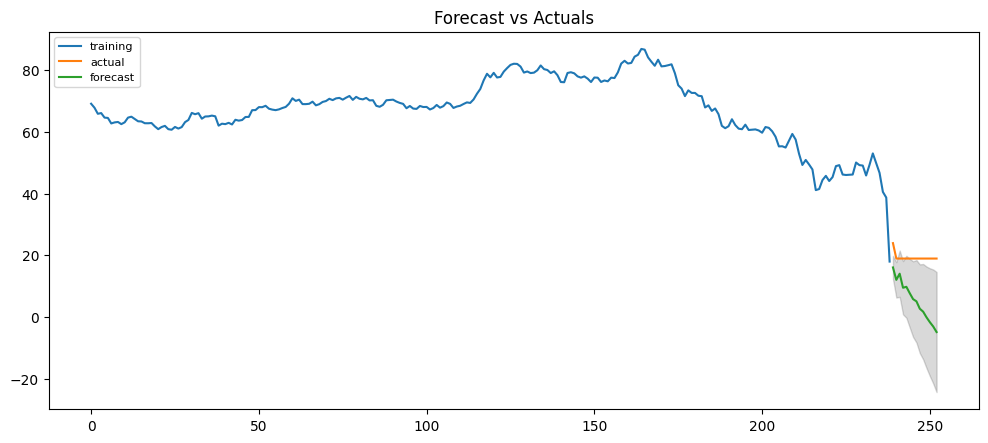

In [ ]:
ArimaModelGraph(model, train_YNDX, test_YNDX)

In general, the model caught the dependence that can be traced in the current data at the moment, so it would be logical to assume that further shares will only fall or stabilize. Confidence interval is small

#### HALF OF YEAR

In [ ]:
half = data2.iloc[:data2.shape[0] // 2 :, ]
train_size = int(len(half)) - 14
test_size = 14
train = half[:train_size]['YNDX']
test = half[train_size:]["YNDX"]
model = ArimaModel(train)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=292.620, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=294.355, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=295.038, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=297.013, Time=0.13 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=298.871, Time=0.17 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=300.827, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=294.298, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=295.722, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=296.981, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=298.978, Time=0.23 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=299.923, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=294.973, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=296.967, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  113
Model:               SARIMAX(3, 2, 2)   Log Likelihood                -260.733
Date:                Fri, 18 Mar 2022   AIC                            535.465
Time:                        07:26:39   BIC                            554.432
Sample:                             0   HQIC                           543.159
                                - 113                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4256      0.627     -0.679      0.497      -1.655       0.804
ar.L1         -0.8863      0.132     -6.704      0.000      -1.145      -0.627
ar.L2         -0.9944      0.103     -9.665      0.0

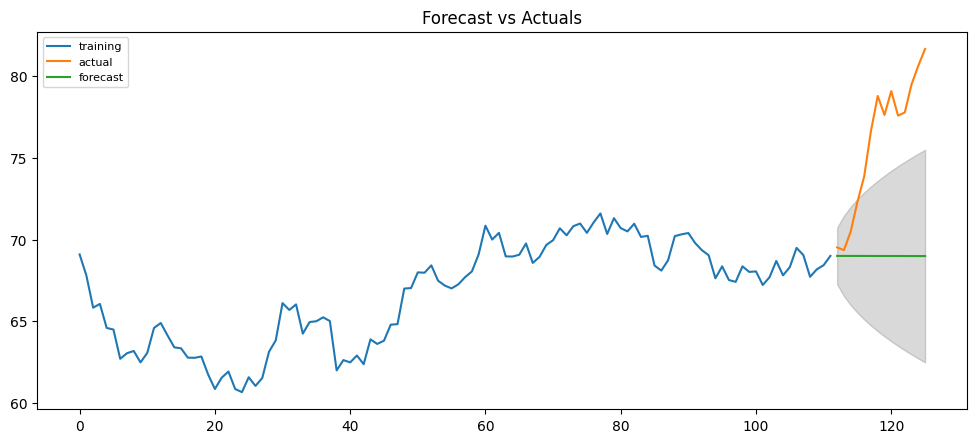

In [ ]:
ArimaModelGraph(model, train, test)

What the model predicted is logical in terms of statistics, because the values ​​before that were more or less stable. However, current data indicates an increase in stock prices. Confidence interval 
the confidence interval has become larger

#### 3 MONTHS

In [ ]:
half = data2.iloc[data2.shape[0] // 4 * 3 : data2.shape[0], ]
train_size = len(half) - 14
test_size = 14
train = half[:train_size]['YNDX']
test = half[train_size:]['YNDX']
model = ArimaModel(train)

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=274.306, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=267.345, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=269.344, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=271.261, Time=0.16 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=265.137, Time=0.24 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=266.164, Time=0.33 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=270.676, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=269.344, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=271.193, Time=0.24 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=266.007, Time=0.34 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=271.547, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=271.291, Time=0.15 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=272.917, Time=0.26 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   50
Model:               SARIMAX(3, 2, 1)   Log Likelihood                -298.305
Date:                Thu, 17 Mar 2022   AIC                            608.610
Time:                        21:34:37   BIC                            619.837
Sample:                             0   HQIC                           612.853
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.6567      5.187     -0.512      0.609     -12.823       7.510
ar.L1         -0.1534      0.249     -0.615      0.538      -0.642       0.335
ar.L2         -0.1813      0.329     -0.550      0.5

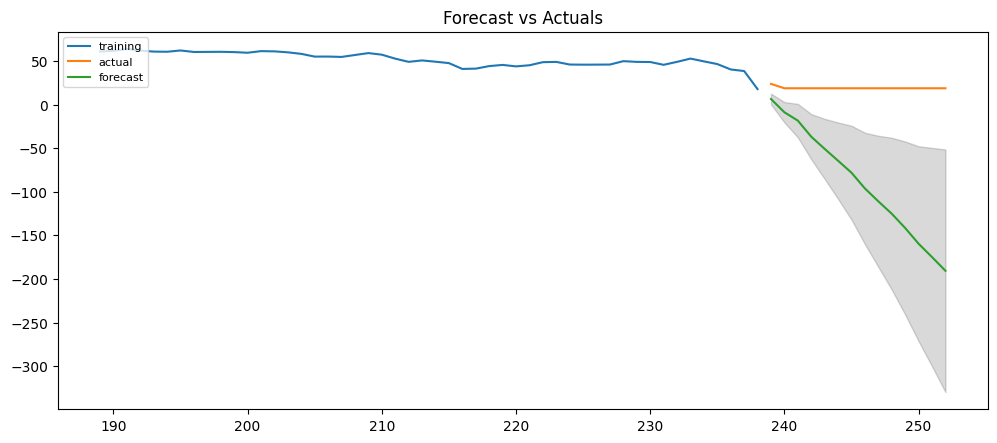

In [ ]:
ArimaModelGraph(model, train, test)

We can see that the pattern shows a strong decline in prices, however this is not the case in reality. In this case, there is not enough data for a more accurate assessment.

### Gasprom (GAZP)

#### YEAR

In [ ]:
train_size = len(data1) - 14
test_size = 14

In [ ]:
train_GAZP = data1[:train_size]['GAZP']
test_GAZP = data1[train_size:]['GAZP']

In [ ]:
model = ArimaModel(train_GAZP)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1569.975, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1567.781, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1568.416, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1566.879, Time=0.21 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1565.919, Time=0.25 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1567.896, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1568.419, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1567.770, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1569.696, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1562.432, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1564.432, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1569.510, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1569.640, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1566.471, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1564.432, Time=0.49 sec
 ARIMA(3,1

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  237
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -775.046
Date:                Fri, 18 Mar 2022   AIC                           1562.091
Time:                        07:31:37   BIC                           1582.874
Sample:                             0   HQIC                          1570.469
                                - 237                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9410      0.806      1.167      0.243      -0.639       2.521
ar.L1         -0.8325      0.144     -5.775      0.000      -1.115      -0.550
ar.L2         -0.1743      0.064     -2.707      0.0

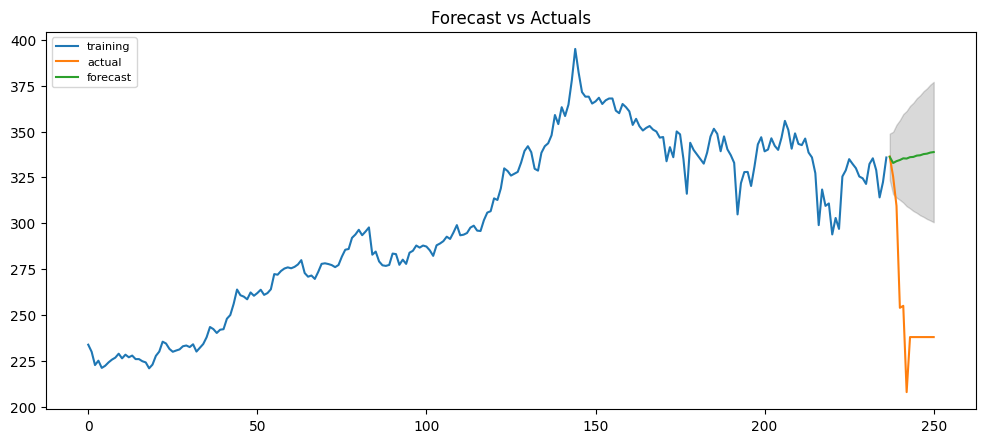

In [ ]:
ArimaModelGraph(model, train_GAZP, test_GAZP)


We see that the model did a poor job of predicting, because the statistics could not predict the war, due to which the share prices of Russian companies are plummeting

#### HALF OF YEAR

In [ ]:
half = data1.iloc[data1.shape[0] // 2 : data1.shape[0], ]
train_size = int(len(half)) - 14
test_size = 14
train = half[:train_size]['GAZP']
test = half[train_size:]['GAZP']
model = ArimaModel(train)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=807.202, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=805.989, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=806.715, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=806.430, Time=0.29 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=806.280, Time=0.40 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=808.250, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=806.707, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=808.219, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=804.369, Time=0.36 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=806.368, Time=0.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=807.826, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=808.168, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=806.368, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  112
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -395.983
Date:                Fri, 18 Mar 2022   AIC                            803.966
Time:                        07:34:34   BIC                            820.224
Sample:                             0   HQIC                           810.561
                                - 112                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1069      1.508      0.071      0.943      -2.848       3.062
ar.L1         -0.7895      0.274     -2.885      0.004      -1.326      -0.253
ar.L2         -0.2238      0.122     -1.840      0.0

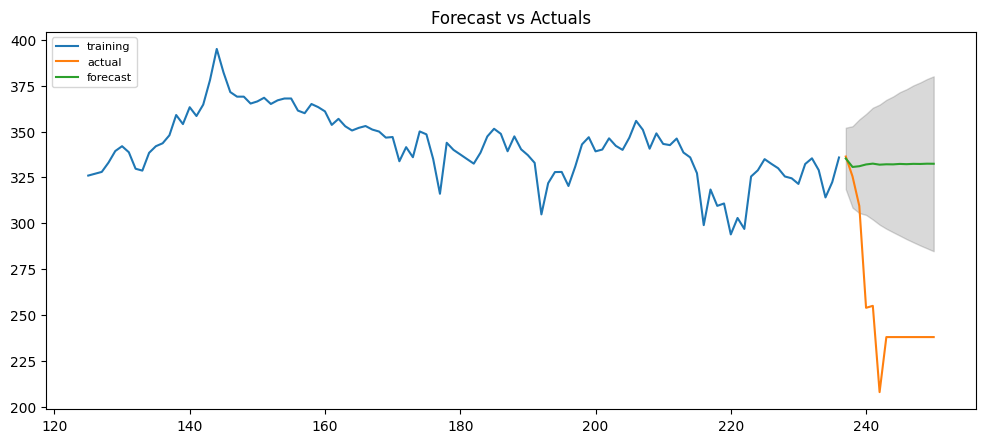

In [ ]:
ArimaModelGraph(model, train, test)

The model did not perform better than before. I think that in general, if you get good results, then you should consider a smaller interval.

#### 3 MONTHS

In [ ]:
half = data1.iloc[data1.shape[0] // 4 * 3 : data1.shape[0], ]
train_size = int(len(half)) - 14
test_size = 14
train = half[:train_size]['GAZP']
test = half[train_size:]['GAZP']
model = ArimaModel(train)

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=416.138, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=398.040, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=396.749, Time=0.27 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=389.455, Time=0.14 sec
 ARIMA(3

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   51
Model:               SARIMAX(5, 2, 0)   Log Likelihood                -187.304
Date:                Fri, 18 Mar 2022   AIC                            388.608
Time:                        07:36:15   BIC                            401.851
Sample:                             0   HQIC                           393.633
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5656      1.989      0.284      0.776      -3.333       4.464
ar.L1         -1.0031      0.139     -7.242      0.000      -1.275      -0.732
ar.L2         -0.8760      0.261     -3.360      0.0

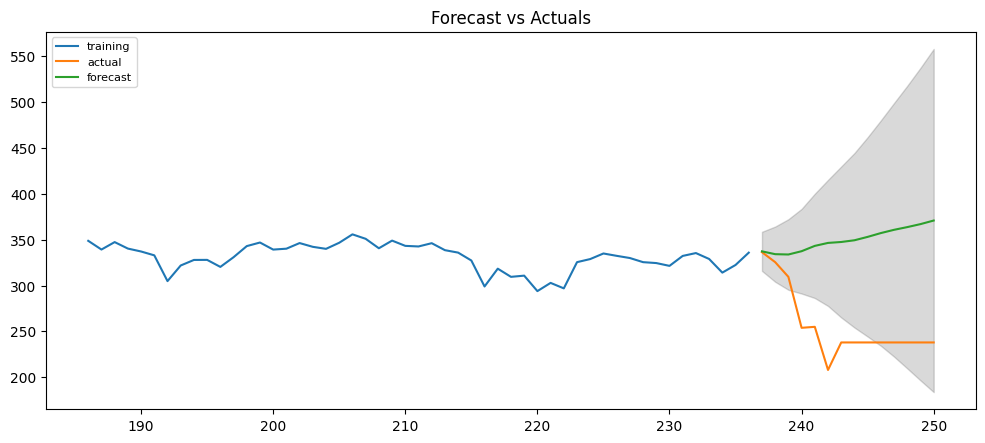

In [ ]:
ArimaModelGraph(model, train, test)

The model slightly reduced the gap between the predicted actual data, however, our confidence interval increased and the overall current trend was not detected by the model.

## Garch

In [ ]:
from arch import arch_model

In [ ]:
data1_returns = data1_returns.dropna()
data2_returns = data2_returns.dropna()

In [ ]:
def GARCH(train):
    model = arch_model(train, vol='GARCH', p=15, q=15, rescale=False)
    model_fit = model.fit(disp="off")
    return model_fit

In [ ]:
def print_GARCH(model_fit):
    fig = model_fit.plot(annualize="D")
    plt.tick_params(axis = 'both',    
                which = 'major',    
                direction = 'inout',    
                labelsize = 10,   
                bottom = True,    
                left = True,  
                labelbottom = True,    
                labelleft = True, 
                labelrotation = 45)
    plt.show()

### Yandex (YNDX)

#### YEAR

In [ ]:
train = data2_returns

In [ ]:
model_fit = GARCH(train)
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:755: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   YNDX   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                590.530
Distribution:                  Normal   AIC:                          -1117.06
Method:            Maximum Likelihood   BIC:                          -1004.12
                                        No. Observations:                  252
Date:                Fri, Mar 18 2022   Df Residuals:                      251
Time:                        07:43:02   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.6294e-04  9.770e-04      0.167      0.868 [-1.752e-03,2.078e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.9661e-05  7.021e-05      0.565      0.572 [-9.794e-05,1.773e-04]
alpha[1]       0.0640  3.410e-02      1.877  6.050e-02   [-2.825e-03,  0.131]
alpha[2]       0.2802      0.107      2.630  8.536e-03    [7.139e-02,  0.489]
alpha[3]   4.6818e-03      0.225  2.080e-02      0.983      [ -0.436,  0.446]
alpha[4]   4.6823e-03      0.136  3.452e-02      0.972      [ -0.261,  0.271]
alpha[5]       0.2454      0.185      1.324      0.185      [ -0.118,  0.609]
alpha[6]   4.6818e-03      0.106  4.402e-02      0.965      [ -0.204,  0.213]
alpha[7]   4.6810e-03      0.131  3.578e-02      0.971      [ -0.252,  0.261]
alpha[8]   4.6813e-03      0.221  2.118e-02      0.983      [ -0.429,  0.438]
alpha[9]   4.6797e-03      0.115  4.060e-02      0.968      [ -0.221,  0.231]
alpha[10]  4.6820e-03      0.150  3.121e-02      0.975      [ -0.289,  0.299]
alpha[11]  4.6800e-03      0.220  2.128e-02      0.983      [ -0.426,  0.436]
alpha[12]  4.6803e-03      0.144  3.242e-02      0.974      [ -0.278,  0.288]
alpha[13]  4.6801e-03      0.112  4.162e-02      0.967      [ -0.216,  0.225]
alpha[14]  4.6806e-03  8.474e-02  5.524e-02      0.956      [ -0.161,  0.171]
alpha[15]  4.6802e-03      0.141  3.323e-02      0.973      [ -0.271,  0.281]
beta[1]        0.0183      0.470  3.889e-02      0.969      [ -0.902,  0.939]
beta[2]        0.0183      0.729  2.507e-02      0.980      [ -1.410,  1.447]
beta[3]        0.0195      0.364  5.366e-02      0.957      [ -0.693,  0.732]
beta[4]        0.0183      0.354  5.156e-02      0.959      [ -0.676,  0.713]
beta[5]        0.0183      0.581  3.142e-02      0.975      [ -1.121,  1.158]
beta[6]        0.0183      0.468  3.904e-02      0.969      [ -0.899,  0.935]
beta[7]        0.0183      0.371  4.927e-02      0.961      [ -0.708,  0.745]
beta[8]        0.0183      0.347  5.259e-02      0.958      [ -0.662,  0.699]
beta[9]        0.0183      0.276  6.616e-02      0.947      [ -0.523,  0.559]
beta[10]       0.0183      0.423  4.313e-02      0.966      [ -0.812,  0.848]
beta[11]       0.0183      0.328  5.564e-02      0.956      [ -0.625,  0.662]
beta[12]       0.0183      0.359  5.085e-02      0.959      [ -0.686,  0.722]
beta[13]       0.0183      0.178      0.103      0.918      [ -0.331,  0.367]
beta[14]       0.0183      0.322  5.673e-02      0.955      [ -0.613,  0.649]
beta[15]       0.1146      0.350      0.327      0.743      [ -0.572,  0.801]
==========================================

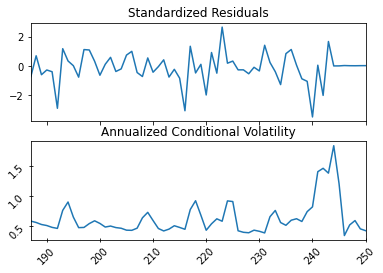

In [ ]:
print_GARCH(model_fit)

We see that in 2022 in the last month, there was a strong spike in the volatility indicator, which is understandable, given the current situation in our country.

#### HALF OF YEAR

In [ ]:
train = data2_returns.iloc[data2_returns.shape[0] // 2 : data2_returns.shape[0], ]
model_fit = GARCH(train)
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:755: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   YNDX   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                246.320
Distribution:                  Normal   AIC:                          -428.640
Method:            Maximum Likelihood   BIC:                          -337.879
                                        No. Observations:                  126
Date:                Fri, Mar 18 2022   Df Residuals:                      125
Time:                        08:37:24   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.6032e-04  2.333e-03  6.872e-02      0.945 [-4.412e-03,4.733e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.1537e-04  9.855e-05      1.171      0.242 [-7.779e-05,3.085e-04]
alpha[1]       0.0814  1.232e-03     66.071      0.000  [7.900e-02,8.383e-02]
alpha[2]       0.6113  3.505e-02     17.439  4.146e-68      [  0.543,  0.680]
alpha[3]       0.1021      0.273      0.374      0.708      [ -0.433,  0.637]
alpha[4]       0.2052      0.489      0.420      0.675      [ -0.753,  1.163]
alpha[5]       0.0000      0.418      0.000      1.000      [ -0.819,  0.819]
alpha[6]       0.0000      0.442      0.000      1.000      [ -0.866,  0.866]
alpha[7]       0.0000      0.338      0.000      1.000      [ -0.661,  0.661]
alpha[8]       0.0000      0.480      0.000      1.000      [ -0.940,  0.940]
alpha[9]       0.0000      0.841      0.000      1.000      [ -1.647,  1.647]
alpha[10]      0.0000      0.907      0.000      1.000      [ -1.777,  1.777]
alpha[11]      0.0000      0.259      0.000      1.000      [ -0.507,  0.507]
alpha[12]      0.0000      0.214      0.000      1.000      [ -0.419,  0.419]
alpha[13]      0.0000      0.543      0.000      1.000      [ -1.064,  1.064]
alpha[14]      0.0000      0.485      0.000      1.000      [ -0.950,  0.950]
alpha[15]  7.8265e-10      0.336  2.330e-09      1.000      [ -0.658,  0.658]
beta[1]    5.3196e-09      0.427  1.245e-08      1.000      [ -0.837,  0.837]
beta[2]        0.0000      0.731      0.000      1.000      [ -1.433,  1.433]
beta[3]        0.0000      0.705      0.000      1.000      [ -1.381,  1.381]
beta[4]        0.0000      0.989      0.000      1.000      [ -1.938,  1.938]
beta[5]        0.0000      0.608      0.000      1.000      [ -1.191,  1.191]
beta[6]        0.0000      0.869      0.000      1.000      [ -1.703,  1.703]
beta[7]        0.0000      1.713      0.000      1.000      [ -3.356,  3.356]
beta[8]        0.0000      1.831      0.000      1.000      [ -3.589,  3.589]
beta[9]        0.0000      0.628      0.000      1.000      [ -1.230,  1.230]
beta[10]       0.0000      0.793      0.000      1.000      [ -1.554,  1.554]
beta[11]       0.0000      1.019      0.000      1.000      [ -1.997,  1.997]
beta[12]       0.0000      1.113      0.000      1.000      [ -2.181,  2.181]
beta[13]       0.0000      0.632      0.000      1.000      [ -1.238,  1.238]
beta[14]   5.2221e-09      0.334  1.563e-08      1.000      [ -0.655,  0.655]
beta[15]       0.0000      0.179      0.000      1.000      [ -0.352,  0.352]
==========================================

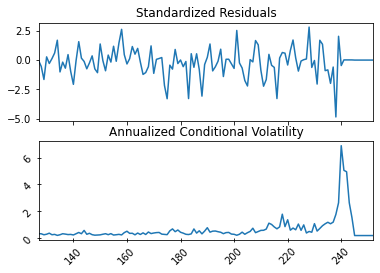

In [ ]:
print_GARCH(model_fit)


The situation is similar to the indicators considered for the year

#### 3 MONTHS

In [ ]:
train =  data2_returns.iloc[data2_returns.shape[0] // 4 * 3 : data2_returns.shape[0], ]
model_fit = GARCH(train)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   YNDX   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                93.9759
Distribution:                  Normal   AIC:                          -123.952
Method:            Maximum Likelihood   BIC:                          -55.3715
                                        No. Observations:                   63
Date:                Fri, Mar 18 2022   Df Residuals:                       62
Time:                        08:48:11   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.2228e-03  3.456e-03      1.511      0.131 [-1.551e-03,1.200e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      7.0980e-04  3.869e-04      1.834  6.660e-02 [-4.861e-05,1.468e-03]
alpha[1]       0.1260  8.728e-03     14.440  2.887e-47      [  0.109,  0.143]
alpha[2]       0.8630  9.381e-02      9.200  3.578e-20      [  0.679,  1.047]
alpha[3]       0.0000      0.520      0.000      1.000      [ -1.020,  1.020]
alpha[4]       0.0000      0.956      0.000      1.000      [ -1.873,  1.873]
alpha[5]       0.0000      0.832      0.000      1.000      [ -1.631,  1.631]
alpha[6]       0.0000      0.484      0.000      1.000      [ -0.948,  0.948]
alpha[7]       0.0000      0.989      0.000      1.000      [ -1.938,  1.938]
alpha[8]       0.0000      0.771      0.000      1.000      [ -1.510,  1.510]
alpha[9]       0.0000      0.955      0.000      1.000      [ -1.872,  1.872]
alpha[10]      0.0000      0.633      0.000      1.000      [ -1.241,  1.241]
alpha[11]      0.0000      0.769      0.000      1.000      [ -1.508,  1.508]
alpha[12]      0.0000      1.411      0.000      1.000      [ -2.766,  2.766]
alpha[13]      0.0000      0.471      0.000      1.000      [ -0.923,  0.923]
alpha[14]      0.0000      0.740      0.000      1.000      [ -1.450,  1.450]
alpha[15]      0.0000      0.699      0.000      1.000      [ -1.369,  1.369]
beta[1]        0.0000      0.717      0.000      1.000      [ -1.405,  1.405]
beta[2]        0.0000      1.181      0.000      1.000      [ -2.314,  2.314]
beta[3]        0.0000      0.964      0.000      1.000      [ -1.888,  1.888]
beta[4]        0.0000      0.633      0.000      1.000      [ -1.241,  1.241]
beta[5]        0.0000      1.204      0.000      1.000      [ -2.360,  2.360]
beta[6]        0.0000      0.761      0.000      1.000      [ -1.493,  1.493]
beta[7]        0.0000      1.196      0.000      1.000      [ -2.343,  2.343]
beta[8]        0.0000      0.859      0.000      1.000      [ -1.683,  1.683]
beta[9]        0.0000      1.104      0.000      1.000      [ -2.163,  2.163]
beta[10]       0.0000      1.670      0.000      1.000      [ -3.273,  3.273]
beta[11]       0.0000      0.649      0.000      1.000      [ -1.272,  1.272]
beta[12]       0.0000      0.942      0.000      1.000      [ -1.847,  1.847]
beta[13]       0.0000      0.795      0.000      1.000      [ -1.558,  1.558]
beta[14]   3.1067e-09  3.392e-02  9.159e-08      1.000 [-6.648e-02,6.648e-02]
beta[15]       0.0109  3.771e-02      0.290      0.772 [-6.299e-02,8.484e-02]
==========================================

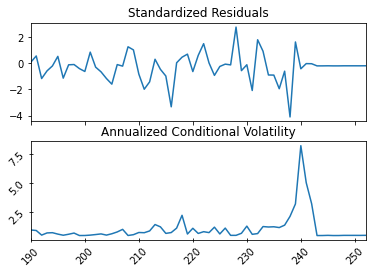

In [ ]:
print_GARCH(model_fit)

And also the same

### Gasprom (GAZP)

#### YEAR

In [ ]:
train = data1_returns
model_fit = GARCH(train)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   GAZP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                630.826
Distribution:                  Normal   AIC:                          -1197.65
Method:            Maximum Likelihood   BIC:                          -1084.97
                                        No. Observations:                  250
Date:                Fri, Mar 18 2022   Df Residuals:                      249
Time:                        08:49:11   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.4476e-03  3.921e-03      0.624      0.532 [-5.237e-03,1.013e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.1060e-05  3.670e-04  8.462e-02      0.933 [-6.883e-04,7.504e-04]
alpha[1]       0.1781      0.431      0.414      0.679      [ -0.666,  1.022]
alpha[2]       0.1421      0.718      0.198      0.843      [ -1.265,  1.549]
alpha[3]       0.0442      0.670  6.599e-02      0.947      [ -1.268,  1.356]
alpha[4]   6.2401e-09      0.411  1.517e-08      1.000      [ -0.806,  0.806]
alpha[5]   6.3343e-09  9.498e-02  6.669e-08      1.000      [ -0.186,  0.186]
alpha[6]   3.4617e-03      0.442  7.833e-03      0.994      [ -0.863,  0.870]
alpha[7]   5.8800e-09      1.105  5.321e-09      1.000      [ -2.166,  2.166]
alpha[8]   6.1653e-09      0.922  6.686e-09      1.000      [ -1.807,  1.807]
alpha[9]       0.0623      0.416      0.150      0.881      [ -0.753,  0.878]
alpha[10]  6.0031e-09      0.597  1.006e-08      1.000      [ -1.169,  1.169]
alpha[11]  6.1502e-09      0.833  7.381e-09      1.000      [ -1.633,  1.633]
alpha[12]  6.1703e-09      0.217  2.842e-08      1.000      [ -0.425,  0.425]
alpha[13]  6.1328e-09      0.267  2.297e-08      1.000      [ -0.523,  0.523]
alpha[14]      0.0383      0.106      0.362      0.717      [ -0.169,  0.246]
alpha[15]  6.1335e-09      0.434  1.413e-08      1.000      [ -0.851,  0.851]
beta[1]    2.4194e-08      0.300  8.068e-08      1.000      [ -0.588,  0.588]
beta[2]    2.4232e-08      0.716  3.386e-08      1.000      [ -1.403,  1.403]
beta[3]    2.4195e-08      2.900  8.343e-09      1.000      [ -5.684,  5.684]
beta[4]    2.4206e-08      3.366  7.191e-09      1.000      [ -6.597,  6.597]
beta[5]    2.4081e-08      0.154  1.559e-07      1.000      [ -0.303,  0.303]
beta[6]    2.4105e-08      0.837  2.880e-08      1.000      [ -1.640,  1.640]
beta[7]    2.4253e-08      2.743  8.842e-09      1.000      [ -5.376,  5.376]
beta[8]    2.4240e-08      0.556  4.362e-08      1.000      [ -1.089,  1.089]
beta[9]    2.4120e-08      3.488  6.915e-09      1.000      [ -6.836,  6.836]
beta[10]   2.4148e-08      0.425  5.687e-08      1.000      [ -0.832,  0.832]
beta[11]   2.4160e-08      0.398  6.069e-08      1.000      [ -0.780,  0.780]
beta[12]   2.4129e-08      1.984  1.216e-08      1.000      [ -3.888,  3.888]
beta[13]   2.2749e-08      1.998  1.139e-08      1.000      [ -3.915,  3.915]
beta[14]   2.4134e-08      1.095  2.203e-08      1.000      [ -2.147,  2.147]
beta[15]       0.5315      1.113      0.478      0.633      [ -1.650,  2.713]
==========================================

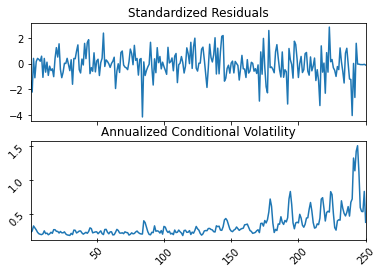

In [ ]:
print_GARCH(model_fit)


For Gazprom, there is also an increase in the volatility coefficient, but it grows more smoothly than for Yandex. This means that sharp changes in price indicators began much earlier.

#### HALF OF YEAR

In [ ]:
train = data1_returns.iloc[data1_returns.shape[0] // 2 : data1_returns.shape[0], ]
model_fit = GARCH(train)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   GAZP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                270.316
Distribution:                  Normal   AIC:                          -476.633
Method:            Maximum Likelihood   BIC:                          -386.127
                                        No. Observations:                  125
Date:                Fri, Mar 18 2022   Df Residuals:                      124
Time:                        08:51:16   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.0077e-04  2.451e-03      0.327      0.744 [-4.003e-03,5.604e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.5742e-04  9.750e-04      0.161      0.872 [-1.753e-03,2.068e-03]
alpha[1]       0.6452      0.265      2.434  1.494e-02      [  0.126,  1.165]
alpha[2]       0.2335      0.722      0.324      0.746      [ -1.181,  1.648]
alpha[3]   2.9909e-11      0.326  9.173e-11      1.000      [ -0.639,  0.639]
alpha[4]   1.8556e-10      0.535  3.467e-10      1.000      [ -1.049,  1.049]
alpha[5]   2.2804e-10      0.550  4.148e-10      1.000      [ -1.077,  1.077]
alpha[6]   2.9775e-10      0.270  1.103e-09      1.000      [ -0.529,  0.529]
alpha[7]   2.6616e-10      1.318  2.020e-10      1.000      [ -2.583,  2.583]
alpha[8]   2.4914e-10      0.600  4.154e-10      1.000      [ -1.176,  1.176]
alpha[9]   1.4183e-10      1.112  1.275e-10      1.000      [ -2.180,  2.180]
alpha[10]  1.3968e-10      0.449  3.112e-10      1.000      [ -0.880,  0.880]
alpha[11]  3.7927e-11      0.571  6.645e-11      1.000      [ -1.119,  1.119]
alpha[12]  8.5794e-11      1.181  7.263e-11      1.000      [ -2.315,  2.315]
alpha[13]  4.8394e-11      0.848  5.704e-11      1.000      [ -1.663,  1.663]
alpha[14]  4.7124e-08      0.587  8.032e-08      1.000      [ -1.150,  1.150]
alpha[15]      0.0111      1.764  6.278e-03      0.995      [ -3.447,  3.469]
beta[1]        0.0000      0.944      0.000      1.000      [ -1.851,  1.851]
beta[2]    5.9390e-11      1.091  5.445e-11      1.000      [ -2.138,  2.138]
beta[3]    1.6582e-10      0.348  4.759e-10      1.000      [ -0.683,  0.683]
beta[4]    2.1055e-10      0.693  3.039e-10      1.000      [ -1.358,  1.358]
beta[5]    2.5356e-10      0.720  3.521e-10      1.000      [ -1.411,  1.411]
beta[6]    2.3008e-10      2.302  9.995e-11      1.000      [ -4.512,  4.512]
beta[7]    1.9571e-10      1.580  1.239e-10      1.000      [ -3.097,  3.097]
beta[8]    1.2220e-10      1.291  9.468e-11      1.000      [ -2.530,  2.530]
beta[9]    9.1966e-11      0.962  9.560e-11      1.000      [ -1.885,  1.885]
beta[10]   3.8105e-11      0.479  7.959e-11      1.000      [ -0.938,  0.938]
beta[11]   6.7990e-11      1.162  5.850e-11      1.000      [ -2.278,  2.278]
beta[12]   2.5798e-11      0.928  2.780e-11      1.000      [ -1.819,  1.819]
beta[13]       0.1103      0.570      0.194      0.847      [ -1.006,  1.227]
beta[14]   4.3474e-08      2.401  1.811e-08      1.000      [ -4.705,  4.705]
beta[15]       0.0000      0.311      0.000      1.000      [ -0.610,  0.610]
==========================================

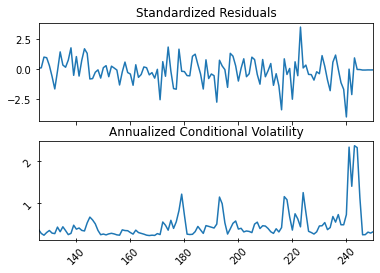

In [ ]:
print_GARCH(model_fit)

Looking at half a year, we see that the volatility factor was unstable throughout the entire period

#### 3 MONTHS

In [ ]:
train = data1_returns.iloc[data1_returns.shape[0] // 4 * 3 : data1_returns.shape[0], ]
model_fit = GARCH(train)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   GAZP   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                117.264
Distribution:                  Normal   AIC:                          -170.529
Method:            Maximum Likelihood   BIC:                          -101.445
                                        No. Observations:                   64
Date:                Fri, Mar 18 2022   Df Residuals:                       63
Time:                        08:52:31   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.0294e-04  4.223e-03     -0.166      0.868 [-8.979e-03,7.573e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.4474e-04  9.629e-04      0.150      0.881 [-1.742e-03,2.032e-03]
alpha[1]       0.2085      0.123      1.697  8.964e-02   [-3.227e-02,  0.449]
alpha[2]       0.2480      0.151      1.645      0.100   [-4.752e-02,  0.543]
alpha[3]   1.3978e-10      0.245  5.716e-10      1.000      [ -0.479,  0.479]
alpha[4]   3.2207e-10      0.206  1.564e-09      1.000      [ -0.404,  0.404]
alpha[5]   2.3951e-10      0.113  2.115e-09      1.000      [ -0.222,  0.222]
alpha[6]   4.6093e-10      0.158  2.919e-09      1.000      [ -0.309,  0.309]
alpha[7]   3.4747e-10      0.177  1.968e-09      1.000      [ -0.346,  0.346]
alpha[8]   1.7112e-10      0.153  1.121e-09      1.000      [ -0.299,  0.299]
alpha[9]   5.1614e-11      0.255  2.025e-10      1.000      [ -0.500,  0.500]
alpha[10]  2.8309e-10      0.320  8.858e-10      1.000      [ -0.626,  0.626]
alpha[11]  1.1911e-10      0.122  9.800e-10      1.000      [ -0.238,  0.238]
alpha[12]  1.4265e-10      0.227  6.278e-10      1.000      [ -0.445,  0.445]
alpha[13]  5.9309e-11      0.158  3.761e-10      1.000      [ -0.309,  0.309]
alpha[14]  8.8613e-11      0.229  3.870e-10      1.000      [ -0.449,  0.449]
alpha[15]  5.1467e-11      0.232  2.221e-10      1.000      [ -0.454,  0.454]
beta[1]    1.4012e-11      0.987  1.420e-11      1.000      [ -1.934,  1.934]
beta[2]    1.1695e-10      0.931  1.256e-10      1.000      [ -1.826,  1.826]
beta[3]    1.3737e-10      0.651  2.111e-10      1.000      [ -1.275,  1.275]
beta[4]    1.7986e-10      0.843  2.135e-10      1.000      [ -1.651,  1.651]
beta[5]    2.0032e-10      0.560  3.579e-10      1.000      [ -1.097,  1.097]
beta[6]    1.1158e-10      0.655  1.702e-10      1.000      [ -1.285,  1.285]
beta[7]        0.0000      0.781      0.000      1.000      [ -1.531,  1.531]
beta[8]    5.3571e-11      1.031  5.196e-11      1.000      [ -2.021,  2.021]
beta[9]    1.1083e-10      0.225  4.930e-10      1.000      [ -0.441,  0.441]
beta[10]   7.7496e-11      0.836  9.273e-11      1.000      [ -1.638,  1.638]
beta[11]   4.2684e-11      0.330  1.293e-10      1.000      [ -0.647,  0.647]
beta[12]   3.9041e-11      0.503  7.768e-11      1.000      [ -0.985,  0.985]
beta[13]   4.6563e-11      0.476  9.779e-11      1.000      [ -0.933,  0.933]
beta[14]   4.2825e-12      0.657  6.523e-12      1.000      [ -1.287,  1.287]
beta[15]       0.5435      0.367      1.479      0.139      [ -0.177,  1.264]
=====================================

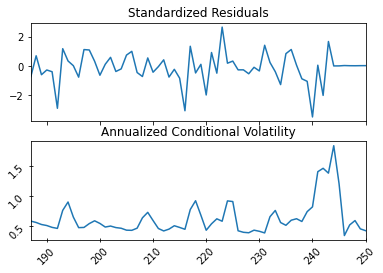

In [ ]:
print_GARCH(model_fit)

## ThymBoost

In [ ]:
from ThymeBoost import ThymeBoost as tb

In [ ]:
def ThymeBoost_model(train):
    boosted_model = tb.ThymeBoost(approximate_splits=True,
                              n_split_proposals=25,
                              verbose=1,
                              cost_penalty=.001)
    output = boosted_model.fit(train,
                           trend_estimator='linear',
                           seasonal_estimator='fourier',
                           seasonal_period=25,
                           split_cost='mse',
                           global_cost='maicc',
                           fit_type='global')
    return boosted_model, output
                           
def plot_Thyme(boosted_model, output):
    
    boosted_model.plot_components(output)
    #plt.
    predicted_output = boosted_model.predict(output, 14)
    boosted_model.plot_results(output, predicted_output)

### Yandex (YNDX)

#### YEAR

In [ ]:
boosted_model, output = ThymeBoost_model(data2['YNDX'])

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: 1378.4939420772312
********** Round 2 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: 1312.2895377577017
Boosting Terminated 
Using round 2


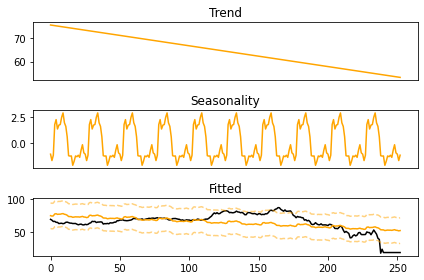

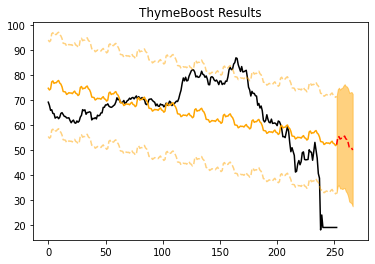

In [ ]:
plot_Thyme(boosted_model, output)

you can see that the model trained very poorly

#### HALF OF YEAR

In [ ]:
boosted_model, output = ThymeBoost_model(data2.iloc[data2.shape[0] // 4 * 3 : data2.shape[0], ]['YNDX'])

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: 351.1245080790899
********** Round 2 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: 187.7397374584504
********** Round 3 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: 186.63354197184893
Boosting Terminated 
Using round 3


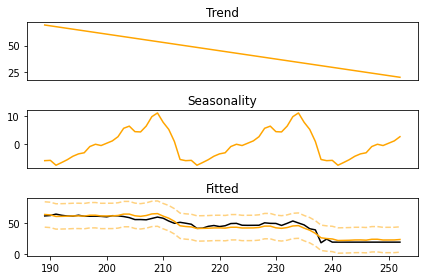

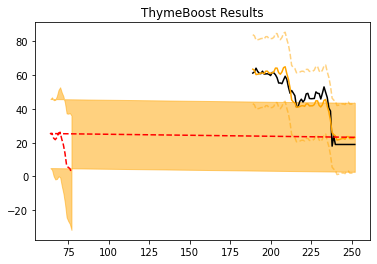

In [ ]:
plot_Thyme(boosted_model, output)


The model is clearly better than on the annual interval, but still not accurate enough

#### 3 MONTHS

In [ ]:
boosted_model, output = ThymeBoost_model(data2.iloc[data2.shape[0] // 4 * 3 : data2.shape[0], ]['YNDX'])

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: 351.1245080790899
********** Round 2 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: 187.7397374584504
********** Round 3 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: 186.63354197184893
Boosting Terminated 
Using round 3


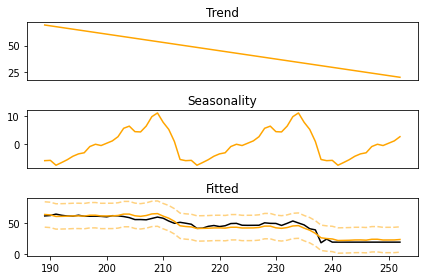

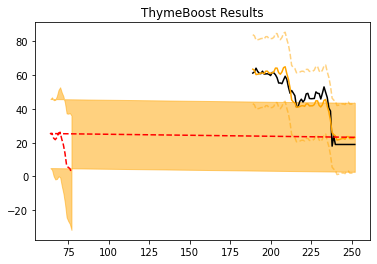

In [ ]:
plot_Thyme(boosted_model, output)


The model trained very well and actually came close to the true values ​​of the data. very large confidence interval

### Gasprom (GAZP)

#### YEAR

In [ ]:
boosted_model, output = ThymeBoost_model(data1['GAZP'])

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: 1918.7406579026467
********** Round 2 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: 1772.917261704104
Boosting Terminated 
Using round 2


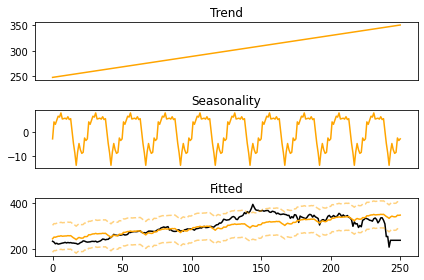

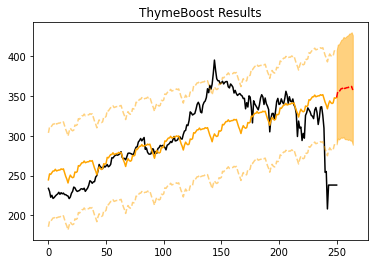

In [ ]:
plot_Thyme(boosted_model, output)


very poorly trained model

#### HALF OF YEAR

In [ ]:
boosted_model, output = ThymeBoost_model(data1.iloc[data1.shape[0] // 2 : data1.shape[0], ]['GAZP'])

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: 880.8466035429472
********** Round 2 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: 798.8498268787827
Boosting Terminated 
Using round 2


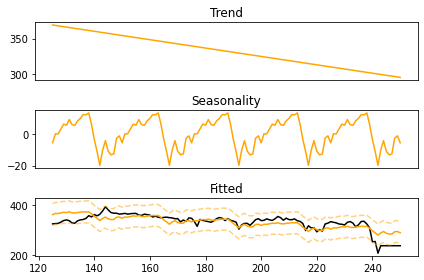

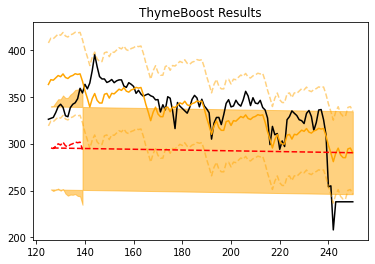

In [ ]:
plot_Thyme(boosted_model, output)


The model is quite close to reality, but the prediction did not match (given recent events, who could have predicted this?) and the confidence interval is too large

#### 3 MONTHS

In [ ]:
boosted_model, output = ThymeBoost_model(data1.iloc[data1.shape[0] // 4*3 : data1.shape[0], ]['GAZP'])

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: 456.8803732451099
********** Round 2 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
fourier(10, False)
cost: 370.5512842756292
Boosting Terminated 
Using round 2


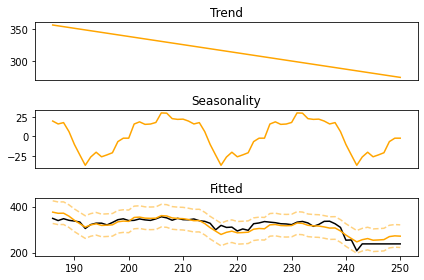

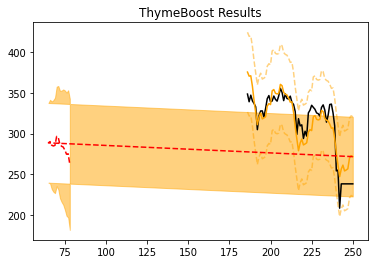

In [ ]:
plot_Thyme(boosted_model, output)


the model makes relatively good predictions, at least they are the closest among all trained, however, the confidence interval is still too large

 # Conclusion

In general, all models have shown themselves quite well and each has its own advantages:

1.   In most cases, ARIMA showed a relatively small confidence interval, but does not reflect the general trend. But it should be borne in mind that this is due to the fact that no one can statistically predict the sanctions that have so rapidly affected the market. Sometimes the model was too pessimistic and the confidence interval grew.
2.   GARCH is better in this regard, it reveals the general trend and takes into account the noise.
3. ThymeBoost showed himself well for short periods of time, this allowed him to make good predictions that were close to the real ones (for a period of 3 months)